In [108]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
dataset = pd.read_csv('./dataset/Social_Network_Ads.csv')

dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [110]:
X = dataset.iloc[:, [2, 3]].values  ## give me column 2,3 in the data set
y = dataset.iloc[:, 4].values       ## give me 4th column

print(X.shape)
#print(y.shape)

(400, 2)


In [111]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature scaling

In [112]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\USER\AppData\Local\conda\conda\envs\statistical-inferences\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Machine learning Algorithms offers the generic interface for creating models and fitting dataset ....

## create_classifier spawns a classifier that can be estimate/fit the training dataset...

##### on the surface most of the classifiers looks more or less the same so where is the difference ??? 

In [113]:
def create_classifier(name="None"):
    classifier=None
    
    if name == "SVM":
        from sklearn.svm import SVC
        classifier = SVC(random_state = 0)
        #classifier.fit(X_train, y_train)
    
    elif name == "Decision Tree":
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(random_state=0)
        #classifier.fit(X_train, y_train)
        
    elif name == "Naive Bayes":
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        #classifier.fit(X_train, y_train)
    
    else: #logistic regression
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        #classifier.fit(X_train, y_train)
    
    return classifier        
        
        

In [114]:
classification_algo = "Decision Tree"
classifier= create_classifier(classification_algo)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [115]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
X_pred = classifier.predict(X_train)

In [116]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 4, 28]])

In [117]:
mse = mean_squared_error(y_test,y_pred)
print('The mse rate is',mse)

The mse rate is 0.1


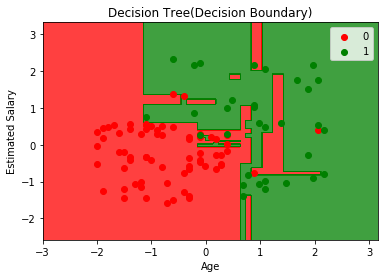

In [118]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
#plt.title('SVM (Decision Boundary)')
plt.title(classification_algo + '(Decision Boundary)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()